# Payment Date Prediction 


### Importing related Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Store the dataset into the Dataframe


In [2]:
df=pd.read_csv("dataset.csv")
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR corp,11-02-2020 00:00,2020,1930438491,26-01-2020,20200125,20200126,20200210,USD,RV,1,NaN,54273.28,20200126,NAH4,1.930438e+09,0
1,U001,200980828,BEN E,08-08-2019 00:00,2019,1929646410,22-07-2019,20190722,20190722,20190811,USD,RV,1,NaN,79656.60,20190722,NAD1,1.929646e+09,0
2,U001,200792734,MDV/ trust,30-12-2019 00:00,2019,1929873765,14-09-2019,20190914,20190914,20190929,USD,RV,1,NaN,2253.86,20190914,NAA8,1.929874e+09,0
3,CA02,140105686,SYSC llc,NaN,2020,2960623488,30-03-2020,20200330,20200330,20200410,CAD,RV,1,NaN,3299.70,20200331,CA10,2.960623e+09,1
4,U001,200769623,WAL-MAR foundation,25-11-2019 00:00,2019,1930147974,13-11-2019,20191113,20191113,20191128,USD,RV,1,NaN,33133.29,20191113,NAH4,1.930148e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50094,CA02,140106408,WAL-M corp,NaN,2020,2960618884,06-03-2020,20200306,20200306,20200316,CAD,RV,1,NaN,92832.27,20200306,CA10,2.960619e+09,1
50095,CA02,140106408,WAL-M corp,NaN,2020,2960618885,06-03-2020,20200306,20200306,20200316,CAD,RV,1,NaN,92832.27,20200306,CA10,2.960619e+09,1
50096,CA02,140106408,WAL-M corp,NaN,2020,2960618886,06-03-2020,20200306,20200306,20200316,CAD,RV,1,NaN,92832.27,20200306,CA10,2.960619e+09,1
50097,CA02,140106408,WAL-M corp,NaN,2020,2960618887,06-03-2020,20200306,20200306,20200316,CAD,RV,1,NaN,92832.27,20200306,CA10,2.960619e+09,1


### Check the shape of the dataframe


In [3]:
shape = df.shape
print('\nDataFrame Shape :', shape)
print('\nNumber of rows :', shape[0])
print('\nNumber of columns :', shape[1])


DataFrame Shape : (50099, 19)

Number of rows : 50099

Number of columns : 19


### Check the Detail information of the dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50099 entries, 0 to 50098
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50099 non-null  object 
 1   cust_number             50099 non-null  object 
 2   name_customer           50099 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50099 non-null  int64  
 5   doc_id                  50099 non-null  int64  
 6   posting_date            50099 non-null  object 
 7   document_create_date    50099 non-null  int64  
 8   document_create_date.1  50099 non-null  int64  
 9   due_in_date             50099 non-null  int64  
 10  invoice_currency        50099 non-null  object 
 11  document type           50099 non-null  object 
 12  posting_id              50099 non-null  int64  
 13  area_business           0 non-null      float64
 14  total_open_amount       50099 non-null

### Display All the column names

In [5]:
df.columns.values

array(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business',
       'total_open_amount', 'baseline_create_date', 'cust_payment_terms',
       'invoice_id', 'isOpen'], dtype=object)

### Describe the entire dataset

In [6]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50099.000000,5.009900e+04,5.009900e+04,5.009900e+04,5.009900e+04,50099.0,0.0,50099.000000,5.009900e+04,5.009300e+04,50099.000000
mean,2019.307072,2.014112e+09,2.019353e+07,2.019355e+07,2.019369e+07,1.0,NaN,32456.565546,2.019355e+07,2.013216e+09,0.201581
std,0.461284,2.912992e+08,4.501712e+03,4.487779e+03,4.475909e+03,0.0,NaN,39259.249400,4.488339e+03,2.795573e+08,0.401185
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929343e+09,2.019051e+07,2.019051e+07,2.019052e+07,1.0,NaN,4943.480000,2.019051e+07,1.929343e+09,0.000000
50%,2019.000000,1.929968e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17700.000000,2.019091e+07,1.929968e+09,0.000000
75%,2020.000000,1.930621e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47385.590000,2.020013e+07,1.930621e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


# Data Cleaning

- Show top 5 records from the dataset

In [7]:
df.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR corp,11-02-2020 00:00,2020,1930438491,26-01-2020,20200125,20200126,20200210,USD,RV,1,NaN,54273.28,20200126,NAH4,1.930438e+09,0
1,U001,200980828,BEN E,08-08-2019 00:00,2019,1929646410,22-07-2019,20190722,20190722,20190811,USD,RV,1,NaN,79656.60,20190722,NAD1,1.929646e+09,0
2,U001,200792734,MDV/ trust,30-12-2019 00:00,2019,1929873765,14-09-2019,20190914,20190914,20190929,USD,RV,1,NaN,2253.86,20190914,NAA8,1.929874e+09,0
3,CA02,140105686,SYSC llc,NaN,2020,2960623488,30-03-2020,20200330,20200330,20200410,CAD,RV,1,NaN,3299.70,20200331,CA10,2.960623e+09,1
4,U001,200769623,WAL-MAR foundation,25-11-2019 00:00,2019,1930147974,13-11-2019,20191113,20191113,20191128,USD,RV,1,NaN,33133.29,20191113,NAH4,1.930148e+09,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

In [8]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
business_code,business_code,0.000000
cust_number,cust_number,0.000000
name_customer,name_customer,0.000000
clear_date,clear_date,20.158087
buisness_year,buisness_year,0.000000
doc_id,doc_id,0.000000
posting_date,posting_date,0.000000
document_create_date,document_create_date,0.000000
document_create_date.1,document_create_date.1,0.000000
due_in_date,due_in_date,0.000000


### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [9]:
display = df[["invoice_id", "doc_id"]]
display

,invoice_id,doc_id
0,1.930438e+09,1930438491
1,1.929646e+09,1929646410
2,1.929874e+09,1929873765
3,2.960623e+09,2960623488
4,1.930148e+09,1930147974
...,...,...
50094,2.960619e+09,2960618884
50095,2.960619e+09,2960618885
50096,2.960619e+09,2960618886
50097,2.960619e+09,2960618887


#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [10]:
df_comparison = df.copy()
df_comparison["baseline_create_date"]= df_comparison["baseline_create_date"].astype(int)
comparison_column = np.where(df_comparison["baseline_create_date"] == df["document_create_date"], True, False)
comparison_column2 = np.where(df["document_create_date.1"] == df["document_create_date"], True, False)
comparison_column3 = np.where(df_comparison["baseline_create_date"] == df_comparison["document_create_date.1"], True, False)
df_comparison["equal"] = comparison_column
df_comparison["equal2"] = comparison_column2
df_comparison["equal3"] = comparison_column3
df_comparison_display = df_comparison[["baseline_create_date","document_create_date", "document_create_date.1","equal","equal2", "equal3"]]
df_comparison_display.head(10)

,baseline_create_date,document_create_date,document_create_date.1,equal,equal2,equal3
0,20200126,20200125,20200126,False,False,True
1,20190722,20190722,20190722,True,True,True
2,20190914,20190914,20190914,True,True,True
3,20200331,20200330,20200330,False,True,False
4,20191113,20191113,20191113,True,True,True
5,20190924,20190920,20190920,False,True,False
6,20191101,20191031,20191101,False,False,True
7,20200319,20200318,20200319,False,False,True
8,20190607,20190605,20190607,False,False,True
9,20190220,20190219,20190220,False,False,True


#### Please check, Column 'posting_id' is constant columns or not


In [11]:
separate_value = df_comparison["posting_id"].nunique(dropna=False)
if(separate_value == 1):
    const = True
else:
    const = False
print("constant:",const)

constant: True


#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [12]:
separate_value = df_comparison["isOpen"].nunique(dropna=False)
if(separate_value == 1):
    const = True
else:
    const = False
print("separate value:",separate_value, " ", "Constant:" ,const)

separate value: 2   Constant: False


### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [13]:
df_copy = df.copy()
df_copy.drop(['area_business','posting_id',"invoice_id","document_create_date","isOpen",'document type',"document_create_date.1"],axis=1,inplace=True)

### Please check from the dataframe whether all the columns are removed or not 

In [14]:
df_copy.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,200769623,WAL-MAR corp,11-02-2020 00:00,2020,1930438491,26-01-2020,20200210,USD,54273.28,20200126,NAH4
1,U001,200980828,BEN E,08-08-2019 00:00,2019,1929646410,22-07-2019,20190811,USD,79656.60,20190722,NAD1
2,U001,200792734,MDV/ trust,30-12-2019 00:00,2019,1929873765,14-09-2019,20190929,USD,2253.86,20190914,NAA8
3,CA02,140105686,SYSC llc,NaN,2020,2960623488,30-03-2020,20200410,CAD,3299.70,20200331,CA10
4,U001,200769623,WAL-MAR foundation,25-11-2019 00:00,2019,1930147974,13-11-2019,20191128,USD,33133.29,20191113,NAH4


### Show all the Duplicate rows from the dataframe

In [15]:
duplicateRowsDF = df_copy[df_copy.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
duplicateRowsDF

Duplicate Rows except first occurrence based on all columns are :


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1041,U001,200769623,WAL-MAR in,12-03-2019 00:00,2019,1928870382,28-02-2019,20190315,USD,19557.41,20190228,NAH4
2400,U001,200769623,WAL-MAR trust,28-08-2019 00:00,2019,1929758460,18-08-2019,20190902,USD,5600.41,20190818,NAH4
2584,U001,200769623,WAL-MAR corporation,16-12-2019 00:00,2019,1930216806,04-12-2019,20191219,USD,35352.17,20191204,NAH4
3755,U001,200769623,WAL-MAR,22-11-2019 00:00,2019,1930137035,12-11-2019,20191127,USD,2982.64,20191112,NAH4
3873,CA02,140104409,LOB associates,NaN,2020,2960628616,14-04-2020,20200425,CAD,82975.82,20200415,CA10
...,...,...,...,...,...,...,...,...,...,...,...,...
49963,U001,200759878,SA us,29-01-2019 00:00,2019,1928613993,13-01-2019,20190128,USD,10968.24,20190113,NAH4
49986,U001,200772670,ASSOCIAT foundation,12-06-2019 00:00,2019,1929403090,29-05-2019,20190613,USD,155837.53,20190529,NAU5
49990,U001,200765011,MAINES llc,06-06-2019 00:00,2019,1929365364,22-05-2019,20190606,USD,4008.05,20190522,NAA8
49991,U001,200704045,RA trust,25-10-2019 00:00,2019,1930001131,10-10-2019,20191025,USD,73002.24,20191010,NAA8


### Display the Number of Duplicate Rows

In [16]:
df_copy.duplicated().sum()

1162

### Drop all the Duplicate Rows

In [17]:
df_copy=df_copy.drop_duplicates()
df_copy

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,200769623,WAL-MAR corp,11-02-2020 00:00,2020,1930438491,26-01-2020,20200210,USD,54273.28,20200126,NAH4
1,U001,200980828,BEN E,08-08-2019 00:00,2019,1929646410,22-07-2019,20190811,USD,79656.60,20190722,NAD1
2,U001,200792734,MDV/ trust,30-12-2019 00:00,2019,1929873765,14-09-2019,20190929,USD,2253.86,20190914,NAA8
3,CA02,140105686,SYSC llc,NaN,2020,2960623488,30-03-2020,20200410,CAD,3299.70,20200331,CA10
4,U001,200769623,WAL-MAR foundation,25-11-2019 00:00,2019,1930147974,13-11-2019,20191128,USD,33133.29,20191113,NAH4
...,...,...,...,...,...,...,...,...,...,...,...,...
50094,CA02,140106408,WAL-M corp,NaN,2020,2960618884,06-03-2020,20200316,CAD,92832.27,20200306,CA10
50095,CA02,140106408,WAL-M corp,NaN,2020,2960618885,06-03-2020,20200316,CAD,92832.27,20200306,CA10
50096,CA02,140106408,WAL-M corp,NaN,2020,2960618886,06-03-2020,20200316,CAD,92832.27,20200306,CA10
50097,CA02,140106408,WAL-M corp,NaN,2020,2960618887,06-03-2020,20200316,CAD,92832.27,20200306,CA10


#### Now check for all duplicate rows now

- Note - It must be 0 by now

In [18]:
df_copy.duplicated().sum()

0

### Check for the number of Rows and Columns in your dataset

In [19]:
rows = len(df_copy.axes[0])
cols = len(df_copy.axes[1])
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  48937
Number of Columns:  12


### Find out the total count of null values in each columns

In [20]:
df_copy.isnull().sum(axis = 0)

business_code              0
cust_number                0
name_customer              0
clear_date              9779
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

#Data type Conversion 

### Please check the data type of each column of the dataframe

In [21]:
df_copy.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year             int64
doc_id                    int64
posting_date             object
due_in_date               int64
invoice_currency         object
total_open_amount       float64
baseline_create_date      int64
cust_payment_terms       object
dtype: object

### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date

In [22]:
type1 = df_copy.dtypes['clear_date']
type2 = df_copy.dtypes['posting_date']
type3 = df_copy.dtypes['due_in_date']
type4 = df_copy.dtypes['baseline_create_date']
print(" clear_date:",type1,"\n","posting_date:",type2,"\n","due_in_date:",type3,"\n","baseline_create_date:",type4)

 clear_date: object 
 posting_date: object 
 due_in_date: int64 
 baseline_create_date: int64


### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [23]:
df_copy['clear_date']=pd.to_datetime(df_copy['clear_date'],infer_datetime_format=True)
df_copy['posting_date']=pd.to_datetime(df_copy['posting_date'],infer_datetime_format=True)
df_copy['due_in_date']=pd.to_datetime(df_copy['due_in_date'],format="%Y%m%d")
df_copy['baseline_create_date']=pd.to_datetime(df_copy['baseline_create_date'],format="%Y%m%d")
df_copy

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,200769623,WAL-MAR corp,2020-11-02,2020,1930438491,2020-01-26,2020-02-10,USD,54273.28,2020-01-26,NAH4
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,USD,79656.60,2019-07-22,NAD1
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,USD,2253.86,2019-09-14,NAA8
3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,CAD,3299.70,2020-03-31,CA10
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,USD,33133.29,2019-11-13,NAH4
...,...,...,...,...,...,...,...,...,...,...,...,...
50094,CA02,140106408,WAL-M corp,NaT,2020,2960618884,2020-03-06,2020-03-16,CAD,92832.27,2020-03-06,CA10
50095,CA02,140106408,WAL-M corp,NaT,2020,2960618885,2020-03-06,2020-03-16,CAD,92832.27,2020-03-06,CA10
50096,CA02,140106408,WAL-M corp,NaT,2020,2960618886,2020-03-06,2020-03-16,CAD,92832.27,2020-03-06,CA10
50097,CA02,140106408,WAL-M corp,NaT,2020,2960618887,2020-03-06,2020-03-16,CAD,92832.27,2020-03-06,CA10


### Please check the datatype of all the columns after conversion of the above 4 columns

In [24]:
df_copy.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                    int64
doc_id                           int64
posting_date            datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
dtype: object

#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency 

In [25]:
df_copy.groupby(['invoice_currency']).size()

invoice_currency
CAD     3926
USD    45011
dtype: int64

#### display the "total_open_amount" column value

In [26]:
df_copy["total_open_amount"]

0        54273.28
1        79656.60
2         2253.86
3         3299.70
4        33133.29
           ...   
50094    92832.27
50095    92832.27
50096    92832.27
50097    92832.27
50098    92832.27
Name: total_open_amount, Length: 48937, dtype: float64

### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [27]:
df_copy.loc[df_copy["invoice_currency"] != "USD", 'converted_usd'] = 0.7 * df_copy["total_open_amount"]
df_copy.loc[df_copy["invoice_currency"] == "USD", 'converted_usd'] = df_copy["total_open_amount"]

### Display the new "converted_usd" column values

In [28]:
df_copy[["invoice_currency","converted_usd"]]

,invoice_currency,converted_usd
0,USD,54273.280
1,USD,79656.600
2,USD,2253.860
3,CAD,2309.790
4,USD,33133.290
...,...,...
50094,CAD,64982.589
50095,CAD,64982.589
50096,CAD,64982.589
50097,CAD,64982.589


### Display year wise total number of record 

- Note -  use "buisness_year" column for this 

In [29]:
df_copy.groupby(['buisness_year']).size()

buisness_year
2019    33975
2020    14962
dtype: int64

### Write the code to delete the following columns 

- 'invoice_currency'
- 'total_open_amount', 

In [30]:
df_copy.drop(['invoice_currency','total_open_amount'],axis=1,inplace=True)

### Write a code to check the number of columns in dataframe

In [31]:
cols = len(df_copy.axes[1])
print("Number of Columns: ", cols)

Number of Columns:  11


# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [32]:
df_copy.isnull()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
50094,False,False,False,True,False,False,False,False,False,False,False
50095,False,False,False,True,False,False,False,False,False,False,False
50096,False,False,False,True,False,False,False,False,False,False,False
50097,False,False,False,True,False,False,False,False,False,False,False


#### Find out the number of null values from the column that you got from the above code

In [33]:
df_copy.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9779
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
baseline_create_date       0
cust_payment_terms         0
converted_usd              0
dtype: int64

### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset ) 

In [34]:
train_dataset = df_copy.dropna()
test_dataset = df_copy[pd.isnull(df_copy).any(axis=1)]

### Check the number of Rows and Columns for both the dataframes 

In [35]:
rows = len(train_dataset.axes[0])
cols = len(train_dataset.axes[1])
print("train_dataset")
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

train_dataset
Number of Rows:  39158
Number of Columns:  11


In [36]:
rows = len(test_dataset.axes[0])
cols = len(test_dataset.axes[1])
print("test_dataset")
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

test_dataset
Number of Rows:  9779
Number of Columns:  11


### Display the 5 records from maindata and nulldata dataframes

In [37]:
train_dataset.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,200769623,WAL-MAR corp,2020-11-02,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290
5,CA02,140106181,THE corporation,2019-04-12,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088


In [38]:
test_dataset.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,200744019,TARG us,NaT,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,200418007,AM,NaT,2020,1930610806,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,200739534,OK systems,NaT,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,200353024,DECA corporation,NaT,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Formula - Delay = clear_date - due_in_date

In [39]:
maindata = train_dataset.copy()
maindata['delay']=(train_dataset['clear_date'] - train_dataset['due_in_date'])
maindata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,delay
0,U001,200769623,WAL-MAR corp,2020-11-02,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,266 days
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3 days
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92 days
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3 days
5,CA02,140106181,THE corporation,2019-04-12,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,-175 days
...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,200762301,C&S WH trust,2019-07-25,2019,1929600989,2019-07-10,2019-07-25,2019-07-10,NAC6,84780.400,0 days
49996,U001,200769623,WAL-MAR co,2019-03-09,2019,1929744070,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.540,-174 days
49997,U001,200772595,SAFEW associates,2020-05-03,2020,1930536775,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.860,59 days
49998,U001,200726979,BJ'S llc,2019-12-12,2019,1930198546,2019-11-27,2019-12-12,2019-11-27,NAA8,63.480,0 days


### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [40]:
mean_df= maindata.groupby('name_customer')['delay'].mean(numeric_only=False)
mean_df.head(5)

name_customer
11078 us            -69 days
17135 associates    -10 days
17135 llc            -3 days
236008 associates    -3 days
99 CE                16 days
Name: delay, dtype: timedelta64[ns]

You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [41]:
maindata["avg_delay"] = maindata["name_customer"].map(mean_df)
maindata.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,delay,avg_delay
0,U001,200769623,WAL-MAR corp,2020-11-02,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,266 days,3 days 00:38:22.665121668
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3 days,25 days 00:00:00
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92 days,26 days 21:49:05.454545454
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3 days,4 days 19:33:27.692307692
5,CA02,140106181,THE corporation,2019-04-12,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,-175 days,51 days 18:40:00


### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [42]:
maindata["avg_delay"] = maindata["avg_delay"].dt.total_seconds().astype(int)

### Display the maindata dataframe 

In [43]:
maindata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,delay,avg_delay
0,U001,200769623,WAL-MAR corp,2020-11-02,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,266 days,261502
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3 days,2160000
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92 days,2324945
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3 days,416007
5,CA02,140106181,THE corporation,2019-04-12,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,-175 days,4473600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,200762301,C&S WH trust,2019-07-25,2019,1929600989,2019-07-10,2019-07-25,2019-07-10,NAC6,84780.400,0 days,-848700
49996,U001,200769623,WAL-MAR co,2019-03-09,2019,1929744070,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.540,-174 days,-124219
49997,U001,200772595,SAFEW associates,2020-05-03,2020,1930536775,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.860,59 days,213942
49998,U001,200726979,BJ'S llc,2019-12-12,2019,1930198546,2019-11-27,2019-12-12,2019-11-27,NAA8,63.480,0 days,1789253


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe 

In [44]:
maindata.drop(['delay','clear_date'],axis=1,inplace=True)

# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [45]:
X = maindata.iloc[:,:-1]
X.head(5)

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,200769623,WAL-MAR corp,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280
1,U001,200980828,BEN E,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600
2,U001,200792734,MDV/ trust,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860
4,U001,200769623,WAL-MAR foundation,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290
5,CA02,140106181,THE corporation,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088


In [46]:
y = maindata.iloc[:,-1]
y = y.to_frame()
y.head(5)

,avg_delay
0,261502
1,2160000
2,2324945
4,416007
5,4473600


#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_loc_test, y_train, y_loc_test = train_test_split(X,y,test_size=0.4,random_state=42)

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [48]:
X_train_rows = len(X_train.axes[0])
X_train_cols = len(X_train.axes[1])
print("X_train")
print("Number of Rows: ", X_train_rows)
print("Number of Columns: ", X_train_cols)
X_loc_test_rows = len(X_loc_test.axes[0])
X_loc_test_cols = len(X_loc_test.axes[1])
print("\nX_loc_test")
print("Number of Rows: ", X_loc_test_rows)
print("Number of Columns: ", X_loc_test_cols)
y_train_rows = len(y_train.axes[0])
y_train_cols = len(y_train.axes[1])
print("\ny_train")
print("Number of Rows: ", y_train_rows)
print("Number of Columns: ", y_train_cols)
y_loc_test_rows = len(y_loc_test.axes[0])
y_loc_test_cols = len(y_loc_test.axes[1])
print("\ny_loc_test")
print("Number of Rows: ", y_loc_test_rows)
print("Number of Columns: ", y_loc_test_cols)

X_train
Number of Rows:  23494
Number of Columns:  10

X_loc_test
Number of Rows:  15664
Number of Columns:  10

y_train
Number of Rows:  23494
Number of Columns:  1

y_loc_test
Number of Rows:  15664
Number of Columns:  1


### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [49]:
X_val, X_test, y_val, y_test = train_test_split(X_loc_test,y_loc_test,test_size=0.5,random_state=42)

### Please check for the number of rows and columns of all the 4 dataframes 

In [50]:
X_val_rows = len(X_val.axes[0])
X_val_cols = len(X_val.axes[1])
print("X_val")
print("Number of Rows: ", X_val_rows)
print("Number of Columns: ", X_val_cols)
X_test_rows = len(X_test.axes[0])
X_test_cols = len(X_test.axes[1])
print("\nX_test")
print("Number of Rows: ", X_test_rows)
print("Number of Columns: ", X_test_cols)
y_val_rows = len(y_val.axes[0])
y_val_cols = len(y_val.axes[1])
print("\ny_val")
print("Number of Rows: ", y_val_rows)
print("Number of Columns: ", y_val_cols)
y_test_rows = len(y_test.axes[0])
y_test_cols = len(y_test.axes[1])
print("\ny_test")
print("Number of Rows: ", y_test_rows)
print("Number of Columns: ", y_test_cols)

X_val
Number of Rows:  7832
Number of Columns:  10

X_test
Number of Rows:  7832
Number of Columns:  10

y_val
Number of Rows:  7832
Number of Columns:  1

y_test
Number of Rows:  7832
Number of Columns:  1


# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

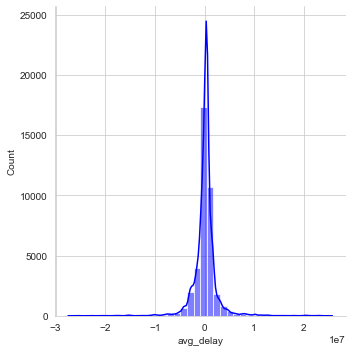

In [51]:
import seaborn as sns
sns.set_style('whitegrid')
sns.displot(y["avg_delay"], color = 'blue', kde=True, bins=40)

### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe 

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [52]:
storedf = X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

### You can make another distribution plot of the "doc_id" column from x_train

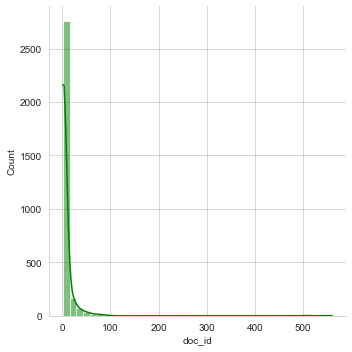

In [53]:
sns.set_style('whitegrid')
sns.displot(storedf["doc_id"], color = 'green', kde=True, bins=40)

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


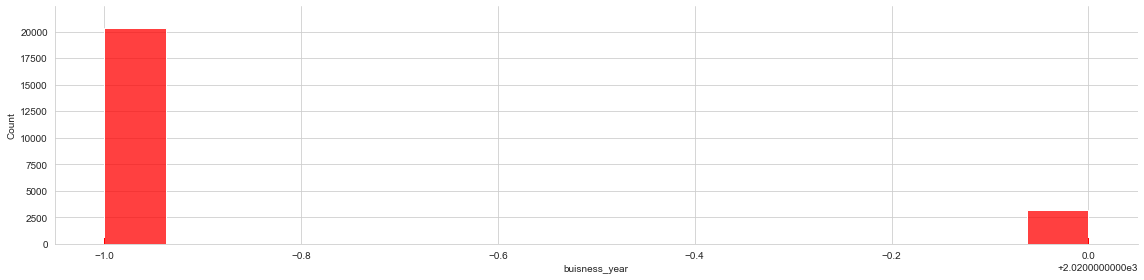

In [54]:
sns.set_style('whitegrid')
sns.displot(X_train["buisness_year"], rug=True, height=4, aspect=4, color='red')

<AxesSubplot:xlabel='buisness_year', ylabel='doc_id'>

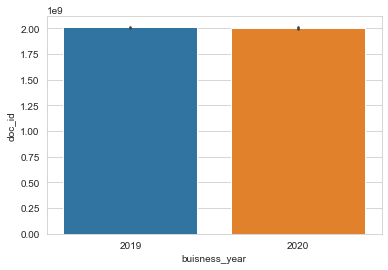

In [55]:
sns.set_style('whitegrid')
sns.barplot(x='buisness_year', y='doc_id', data=X_train)

# Feature Engineering 

### Display and describe the X_train dataframe 

In [56]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
44556,U001,200756072,REINHA corp,2019,1929516074,2019-06-20,2019-07-05,2019-06-20,NAA8,54315.10
36713,U001,200776463,KROGE corp,2020,1930432030,2020-01-23,2020-02-07,2020-01-23,NAA8,52725.92
2639,U001,200794332,COST systems,2019,1928699109,2019-01-30,2019-02-14,2019-01-30,NAAX,21126.47
49682,U001,200780383,MEIJ foundation,2020,1930340825,2019-12-31,2020-01-15,2019-12-31,NAA8,143649.72
45201,U001,200769623,WAL-MAR foundation,2019,1929880806,2019-09-17,2019-10-02,2019-09-17,NAH4,14864.00
...,...,...,...,...,...,...,...,...,...,...
7745,U013,140103699,L&E IN,2019,1991835238,2019-11-15,2019-12-15,2019-11-15,NAVE,20131.46
14076,U001,200900909,SYSCO co,2019,1929116720,2019-04-12,2019-04-27,2019-04-12,NAA8,2363.61
48693,U001,200769623,WAL-MAR trust,2020,1930412664,2020-01-20,2020-02-04,2020-01-20,NAH4,6663.73
1054,U001,200764795,SYSCO associates,2019,1929948062,2019-10-03,2019-10-18,2019-10-03,NAA8,3010.12


In [57]:
X_train.describe()

,buisness_year,doc_id,converted_usd
count,23494.000000,2.349400e+04,23494.000000
mean,2019.134077,2.011913e+09,30618.192289
std,0.340742,2.852458e+08,36500.609654
min,2019.000000,1.928502e+09,0.790000
25%,2019.000000,1.929174e+09,4569.665750
50%,2019.000000,1.929732e+09,16795.265000
75%,2019.000000,1.930209e+09,45472.520500
max,2020.000000,9.500000e+09,668593.360000


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [58]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(X_train["business_code"])

LabelEncoder()

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks 

In [59]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

In [60]:
X_val['business_code_enc'] = business_coder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.transform(X_test['business_code'])

### Display "business_code" and "business_code_enc" together from X_train dataframe 

In [61]:
X_train[["business_code","business_code_enc"]].head()

,business_code,business_code_enc
44556,U001,1
36713,U001,1
2639,U001,1
49682,U001,1
45201,U001,1


#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [62]:
def custom(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code 

In [63]:
X_train, X_val, X_test = custom(['business_code'])

### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here 



In [64]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [65]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [66]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [67]:
X_train ,X_val, X_test = custom(['name_customer'])

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [68]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

In [69]:
X_train ,X_val, X_test = custom(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [70]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23494 entries, 44556 to 19783
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   cust_number             23494 non-null  int32         
 1   buisness_year           23494 non-null  int64         
 2   doc_id                  23494 non-null  int64         
 3   posting_date            23494 non-null  datetime64[ns]
 4   due_in_date             23494 non-null  datetime64[ns]
 5   baseline_create_date    23494 non-null  datetime64[ns]
 6   converted_usd           23494 non-null  float64       
 7   business_code_enc       23494 non-null  int32         
 8   name_customer_enc       23494 non-null  int32         
 9   cust_payment_terms_enc  23494 non-null  int32         
dtypes: datetime64[ns](3), float64(1), int32(4), int64(2)
memory usage: 1.6 MB


In [71]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7832 entries, 45154 to 13798
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   cust_number             7832 non-null   int32         
 1   buisness_year           7832 non-null   int64         
 2   doc_id                  7832 non-null   int64         
 3   posting_date            7832 non-null   datetime64[ns]
 4   due_in_date             7832 non-null   datetime64[ns]
 5   baseline_create_date    7832 non-null   datetime64[ns]
 6   converted_usd           7832 non-null   float64       
 7   business_code_enc       7832 non-null   int32         
 8   name_customer_enc       7832 non-null   int32         
 9   cust_payment_terms_enc  7832 non-null   int32         
dtypes: datetime64[ns](3), float64(1), int32(4), int64(2)
memory usage: 550.7 KB


In [72]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7832 entries, 6118 to 44809
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   cust_number             7832 non-null   int32         
 1   buisness_year           7832 non-null   int64         
 2   doc_id                  7832 non-null   int64         
 3   posting_date            7832 non-null   datetime64[ns]
 4   due_in_date             7832 non-null   datetime64[ns]
 5   baseline_create_date    7832 non-null   datetime64[ns]
 6   converted_usd           7832 non-null   float64       
 7   business_code_enc       7832 non-null   int32         
 8   name_customer_enc       7832 non-null   int32         
 9   cust_payment_terms_enc  7832 non-null   int32         
dtypes: datetime64[ns](3), float64(1), int32(4), int64(2)
memory usage: 550.7 KB


### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column 

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset 
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year






In [73]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year



### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [74]:
X_train ,X_val, X_test = custom(['posting_date'])

### You need to extract day, month and year from the "baseline_create_date" column 

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset 
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [75]:
X_train["day_of_createdate"] = X_train["baseline_create_date"].dt.day
X_train["month_of_createdate"] = X_train["baseline_create_date"].dt.month
X_train["year_of_createdate"] = X_train["baseline_create_date"].dt.year

X_val["day_of_createdate"] = X_val["baseline_create_date"].dt.day
X_val["month_of_createdate"] = X_val["baseline_create_date"].dt.month
X_val["year_of_createdate"] = X_val["baseline_create_date"].dt.year


X_test["day_of_createdate"] = X_test["baseline_create_date"].dt.day
X_test["month_of_createdate"] = X_test["baseline_create_date"].dt.month
X_test["year_of_createdate"] = X_test["baseline_create_date"].dt.year

### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [76]:
X_train ,X_val, X_test = custom(["baseline_create_date"])

### You need to extract day, month and year from the "due_in_date" column 

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset 
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [77]:
X_train["day_of_due"] = X_train["due_in_date"].dt.day
X_train["month_of_due"] = X_train["due_in_date"].dt.month
X_train["year_of_due"] = X_train["due_in_date"].dt.year

X_val["day_of_due"] = X_val["due_in_date"].dt.day
X_val["month_of_due"] = X_val["due_in_date"].dt.month
X_val["year_of_due"] = X_val["due_in_date"].dt.year


X_test["day_of_due"] = X_test["due_in_date"].dt.day
X_test["month_of_due"] = X_test["due_in_date"].dt.month
X_test["year_of_due"] = X_test["due_in_date"].dt.year

pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [78]:
X_train ,X_val, X_test = custom(["due_in_date"])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format 


In [79]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23494 entries, 44556 to 19783
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             23494 non-null  int32  
 1   buisness_year           23494 non-null  int64  
 2   doc_id                  23494 non-null  int64  
 3   converted_usd           23494 non-null  float64
 4   business_code_enc       23494 non-null  int32  
 5   name_customer_enc       23494 non-null  int32  
 6   cust_payment_terms_enc  23494 non-null  int32  
 7   day_of_postingdate      23494 non-null  int64  
 8   month_of_postingdate    23494 non-null  int64  
 9   year_of_postingdate     23494 non-null  int64  
 10  day_of_createdate       23494 non-null  int64  
 11  month_of_createdate     23494 non-null  int64  
 12  year_of_createdate      23494 non-null  int64  
 13  day_of_due              23494 non-null  int64  
 14  month_of_due            23494 non-

In [80]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7832 entries, 45154 to 13798
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             7832 non-null   int32  
 1   buisness_year           7832 non-null   int64  
 2   doc_id                  7832 non-null   int64  
 3   converted_usd           7832 non-null   float64
 4   business_code_enc       7832 non-null   int32  
 5   name_customer_enc       7832 non-null   int32  
 6   cust_payment_terms_enc  7832 non-null   int32  
 7   day_of_postingdate      7832 non-null   int64  
 8   month_of_postingdate    7832 non-null   int64  
 9   year_of_postingdate     7832 non-null   int64  
 10  day_of_createdate       7832 non-null   int64  
 11  month_of_createdate     7832 non-null   int64  
 12  year_of_createdate      7832 non-null   int64  
 13  day_of_due              7832 non-null   int64  
 14  month_of_due            7832 non-nu

In [81]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7832 entries, 6118 to 44809
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             7832 non-null   int32  
 1   buisness_year           7832 non-null   int64  
 2   doc_id                  7832 non-null   int64  
 3   converted_usd           7832 non-null   float64
 4   business_code_enc       7832 non-null   int32  
 5   name_customer_enc       7832 non-null   int32  
 6   cust_payment_terms_enc  7832 non-null   int32  
 7   day_of_postingdate      7832 non-null   int64  
 8   month_of_postingdate    7832 non-null   int64  
 9   year_of_postingdate     7832 non-null   int64  
 10  day_of_createdate       7832 non-null   int64  
 11  month_of_createdate     7832 non-null   int64  
 12  year_of_createdate      7832 non-null   int64  
 13  day_of_due              7832 non-null   int64  
 14  month_of_due            7832 non-nul

# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [82]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

16

- Note - Keep the code as it is, no need to change 


In [83]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [84]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [85]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [86]:
train=X_train.copy()
handling_correlation(train.copy(),threshold=0.85)

['month_of_due',
 'year_of_due',
 'month_of_createdate',
 'year_of_postingdate',
 'day_of_createdate',
 'year_of_createdate']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

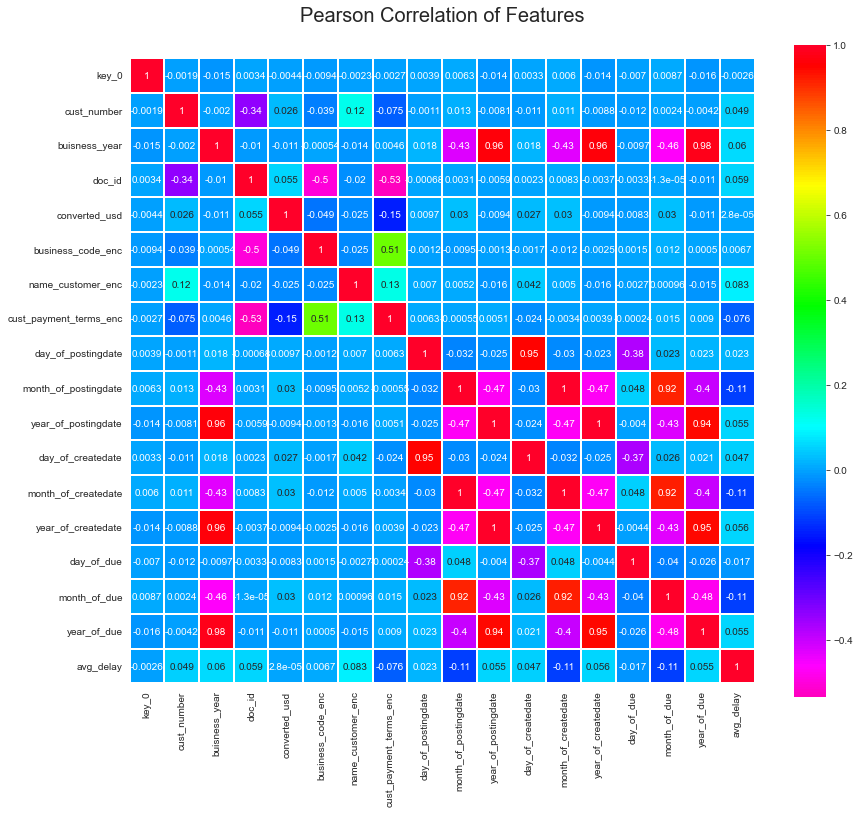

In [87]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [88]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [89]:
sel.variances_

array([1.73096954e+15, 1.16100201e-01, 8.13617218e+16, 1.33223780e+09,
       2.80596482e-01, 1.05187609e+06, 1.23314110e+02, 7.59077911e+01,
       1.23199874e+01, 1.16288980e-01, 7.75034812e+01, 1.23305592e+01,
       1.16501724e-01, 7.61464282e+01, 1.21259307e+01, 1.19305793e-01])

### Features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [90]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [91]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [92]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [93]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

2383193.372136156

### Display The Comparison Lists

In [94]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[6206416082907.17],[0.041982661176058866],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [95]:
from sklearn.svm import SVR
Algorithm.append('SVR')
regressor = SVR()
regressor.fit(X_train, y_train.values.ravel())
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [96]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [97]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

2456745.091152321

### Display The Comparison Lists

In [98]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SVR'],[6206416082907.17, 6505167118253.6875],[0.041982661176058866, -0.004132305663145486],

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [99]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('DecisionTreeRegressor')
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [100]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [101]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

3048914.1061324533

### Display The Comparison Lists

In [102]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SVR', 'DecisionTreeRegressor'],[6206416082907.17, 6505167118253.6875, 8856323409163.309],[0.041982661176058866, -0.004132305663145486, -0.3670548785115526],

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [103]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('RandomForestRegressor')
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train.values.ravel())
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [104]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [105]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

2153951.011838824

### Display The Comparison Lists


In [106]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SVR', 'DecisionTreeRegressor', 'RandomForestRegressor'],[6206416082907.17, 6505167118253.6875, 8856323409163.309, 4903675628278.516],[0.041982661176058866, -0.004132305663145486, -0.3670548785115526, 0.24307261822209558],

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [107]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [108]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [109]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

2147302.219331731

### Display The Comparison Lists


In [110]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SVR', 'DecisionTreeRegressor', 'RandomForestRegressor', 'XGB Regressor'],[6206416082907.17, 6505167118253.6875, 8856323409163.309, 4903675628278.516, 4974765130444.331],[0.041982661176058866, -0.004132305663145486, -0.3670548785115526, 0.24307261822209558, 0.2320993004855071],

## You need to make the comparison list into a comparison dataframe 

In [111]:
comparisondf = pd.DataFrame(data=[Algorithm,MSE_Score, R2_Score]).transpose()
comparisondf.columns = ['Algorithm','MSE_Score', 'R2_Score']
comparisondf

,Algorithm,MSE_Score,R2_Score
0,LinearRegression,6206416082907.169922,0.041983
1,SVR,6505167118253.6875,-0.004132
2,DecisionTreeRegressor,8856323409163.308594,-0.367055
3,RandomForestRegressor,4903675628278.515625,0.243073
4,XGB Regressor,4974765130444.331055,0.232099


## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [112]:
import pickle
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
filename = 'model.sav'
pickle.dump(regressorfinal, open(filename, 'wb'))
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [113]:
mean_squared_error(y_test,predictedfinal,squared=False)

2230418.151478402

### Calculate the mean Square Error for validation dataset

In [114]:
mean_squared_error(y_val,predict_testfinal,squared=False)

2147302.219331731

### Calculate the R2 score for test

In [115]:
r2_score(y_test, predictedfinal)

0.2320993004855071

### Calculate the R2 score for Validation

In [116]:
r2_score(y_val, predict_testfinal)

0.23426117698967697

### Calculate the Accuracy for train Dataset 

In [117]:
regressorfinal.score(X_train, y_train)*100

66.36605612521352

### Calculate the accuracy for validation

In [118]:
regressorfinal.score(X_val, y_val)*100

23.426117698967698

### Calculate the accuracy for test

In [119]:
regressorfinal.score(X_test, y_test)*100

23.20993004855071

## Specify the reason behind choosing your machine learning model 

- Note : Provide your answer as a text here

The reason behind choosing the XGBoost regression model is that it undermines the over-fitting and under-fitting conditions, and from the comparison table obtained above it can be concluded that it gives minimum MSE score (i.e 111304097176.712372) and better R2Score(i.e 0.764208 ~76%) and hence gives fair accuracy.

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding 
- Step 2 : Day, Month and Year extraction 
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns 

### Display the Nulldata 

In [120]:
test_dataset.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,200744019,TARG us,NaT,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,200418007,AM,NaT,2020,1930610806,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,200739534,OK systems,NaT,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,200353024,DECA corporation,NaT,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06


### Check for the number of rows and columns in the nulldata

In [121]:
shape = test_dataset.shape
print('\nDataFrame Shape :', shape)
print('\nNumber of rows :', shape[0])
print('\nNumber of columns :', shape[1])


DataFrame Shape : (9779, 11)

Number of rows : 9779

Number of columns : 11


### Check the Description and Information of the nulldata 

In [122]:
test_dataset.describe()

,buisness_year,doc_id,converted_usd
count,9779.0,9.779000e+03,9779.000000
mean,2020.0,2.015730e+09,32395.557081
std,0.0,2.824983e+08,35393.870859
min,2020.0,1.930535e+09,0.720000
25%,2020.0,1.930660e+09,5731.950000
50%,2020.0,1.930732e+09,19403.930000
75%,2020.0,1.930821e+09,48806.640000
max,2020.0,2.960636e+09,653644.800000


In [123]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9779 entries, 3 to 50098
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         9779 non-null   object        
 1   cust_number           9779 non-null   object        
 2   name_customer         9779 non-null   object        
 3   clear_date            0 non-null      datetime64[ns]
 4   buisness_year         9779 non-null   int64         
 5   doc_id                9779 non-null   int64         
 6   posting_date          9779 non-null   datetime64[ns]
 7   due_in_date           9779 non-null   datetime64[ns]
 8   baseline_create_date  9779 non-null   datetime64[ns]
 9   cust_payment_terms    9779 non-null   object        
 10  converted_usd         9779 non-null   float64       
dtypes: datetime64[ns](4), float64(1), int64(2), object(4)
memory usage: 916.8+ KB


### Storing the Nulldata into a different dataset 
# for BACKUP

In [124]:
nulldata = test_dataset.copy()
nulldata1=nulldata.copy()

### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [125]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [126]:
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use - 

*   dt.day
*   dt.month
*   dt.year

In [127]:
nulldata["day_of_cleardate"] = nulldata["clear_date"].dt.day
nulldata["month_of_cleardate"] = nulldata["clear_date"].dt.month
nulldata["year_of_cleardate"] = nulldata["clear_date"].dt.year

nulldata["day_of_postingdate"] = nulldata["posting_date"].dt.day
nulldata["month_of_postingdate"] = nulldata["posting_date"].dt.month
nulldata["year_of_postingdate"] = nulldata["posting_date"].dt.year

nulldata["day_of_due"] = nulldata["due_in_date"].dt.day
nulldata["month_of_due"] = nulldata["due_in_date"].dt.month
nulldata["year_of_due"] = nulldata["due_in_date"].dt.year

nulldata["day_of_createdate"] = nulldata["baseline_create_date"].dt.day
nulldata["month_of_createdate"] = nulldata["baseline_create_date"].dt.month
nulldata["year_of_createdate"] = nulldata["baseline_create_date"].dt.year

### Use Label Encoder1 of all the following columns - 
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [128]:
nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc']=label_encoder.transform(nulldata['name_customer'])


### Check for the datatypes of all the columns of Nulldata

In [129]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9779 entries, 3 to 50098
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           9779 non-null   object        
 1   cust_number             9779 non-null   int32         
 2   name_customer           9779 non-null   object        
 3   clear_date              0 non-null      datetime64[ns]
 4   buisness_year           9779 non-null   int64         
 5   doc_id                  9779 non-null   int64         
 6   posting_date            9779 non-null   datetime64[ns]
 7   due_in_date             9779 non-null   datetime64[ns]
 8   baseline_create_date    9779 non-null   datetime64[ns]
 9   cust_payment_terms      9779 non-null   object        
 10  converted_usd           9779 non-null   float64       
 11  business_code_enc       9779 non-null   int32         
 12  day_of_cleardate        0 non-null      float64

### Now you need to drop all the unnecessary columns - 

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [130]:
nulldata.drop(['business_code',"baseline_create_date","due_in_date","posting_date","name_customer","clear_date","cust_payment_terms",'day_of_cleardate',"month_of_cleardate","year_of_cleardate"],axis='columns', inplace=True)

### Check the information of the "nulldata" dataframe

In [131]:
nulldata.head(5)

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_due,month_of_due,year_of_due,day_of_createdate,month_of_createdate,year_of_createdate,cust_payment_terms_enc,name_customer_enc
3,140105686,2020,2960623488,2309.79,65,30,3,2020,10,4,2020,31,3,2020,5,2694
7,200744019,2020,1930659387,11173.02,65,19,3,2020,3,4,2020,19,3,2020,21,2777
10,200418007,2020,1930610806,3525.59,65,11,3,2020,26,3,2020,11,3,2020,21,96
14,200739534,2020,1930788296,121105.65,65,15,4,2020,30,4,2020,15,4,2020,21,2008
15,200353024,2020,1930817482,3726.06,65,23,4,2020,26,4,2020,16,4,2020,36,729


### Compare "nulldata" with the "X_test" dataframe 

- use info() method

In [132]:
print(nulldata.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9779 entries, 3 to 50098
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9779 non-null   int32  
 1   buisness_year           9779 non-null   int64  
 2   doc_id                  9779 non-null   int64  
 3   converted_usd           9779 non-null   float64
 4   business_code_enc       9779 non-null   int32  
 5   day_of_postingdate      9779 non-null   int64  
 6   month_of_postingdate    9779 non-null   int64  
 7   year_of_postingdate     9779 non-null   int64  
 8   day_of_due              9779 non-null   int64  
 9   month_of_due            9779 non-null   int64  
 10  year_of_due             9779 non-null   int64  
 11  day_of_createdate       9779 non-null   int64  
 12  month_of_createdate     9779 non-null   int64  
 13  year_of_createdate      9779 non-null   int64  
 14  cust_payment_terms_enc  9779 non-null  

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe 
- Display all the columns of the Nulldata dataframe 
- Store the Nulldata with new sequence into a new dataframe 


- Note - The code is given below, no need to change 

In [133]:
X_test.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due'],
      dtype='object')

In [134]:
nulldata.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_due', 'month_of_due', 'year_of_due',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

In [135]:
nulldata2=nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due']]

### Display the Final Dataset

In [136]:
nulldata2.head(5)

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_createdate,month_of_createdate,year_of_createdate,day_of_due,month_of_due,year_of_due
3,140105686,2020,2960623488,2309.79,65,2694,5,30,3,2020,31,3,2020,10,4,2020
7,200744019,2020,1930659387,11173.02,65,2777,21,19,3,2020,19,3,2020,3,4,2020
10,200418007,2020,1930610806,3525.59,65,96,21,11,3,2020,11,3,2020,26,3,2020
14,200739534,2020,1930788296,121105.65,65,2008,21,15,4,2020,15,4,2020,30,4,2020
15,200353024,2020,1930817482,3726.06,65,729,36,23,4,2020,16,4,2020,26,4,2020


### Now you can pass this dataset into you final model and store it into "final_result"

In [137]:
final_result=regressorfinal.predict(nulldata2)

### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [138]:
final_result = pd.Series(final_result,name='avg_delay')

### Display the "avg_delay" column

In [139]:
final_result

0       3.966692e+05
1       1.196675e+06
2       5.958273e+05
3      -4.513872e+05
4      -5.646504e+05
            ...     
9774   -6.575489e+05
9775   -6.575489e+05
9776   -6.575489e+05
9777   -6.575489e+05
9778   -6.575489e+05
Name: avg_delay, Length: 9779, dtype: float32

### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [140]:
nulldata1.reset_index(drop=True,inplace=True)
Final = nulldata1.merge(final_result , on = nulldata.index )

### Display the "Final" dataframe 

In [141]:
Final.head(5)

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79,3.966692e+05
1,7,U001,200744019,TARG us,NaT,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02,1.196675e+06
2,10,U001,200418007,AM,NaT,2020,1930610806,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59,5.958273e+05
3,14,U001,200739534,OK systems,NaT,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65,-4.513872e+05
4,15,U001,200353024,DECA corporation,NaT,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06,-5.646504e+05


### Check for the Number of Rows and Columns in your "Final" dataframe 

In [142]:
shape = Final.shape
print('\nDataFrame Shape :', shape)
print('\nNumber of rows :', shape[0])
print('\nNumber of columns :', shape[1])


DataFrame Shape : (9779, 13)

Number of rows : 9779

Number of columns : 13


### Now, you need to do convert the below fields back into date and time format 

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change 

In [143]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

### Display the "clear_date" column

In [144]:
Final['clear_date']

0      2020-04-14 14:11:09.156250
1      2020-04-16 20:24:35.250000
2      2020-04-01 21:30:27.312500
3      2020-04-24 18:36:52.812500
4      2020-04-19 11:09:09.625000
                  ...            
9774   2020-03-08 09:20:51.125000
9775   2020-03-08 09:20:51.125000
9776   2020-03-08 09:20:51.125000
9777   2020-03-08 09:20:51.125000
9778   2020-03-08 09:20:51.125000
Name: clear_date, Length: 9779, dtype: datetime64[ns]

### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change 

In [145]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

### Display the "avg_delay" column 

In [146]:
Final['avg_delay']

0        4.0
1       13.0
2        6.0
3       -6.0
4       -7.0
        ... 
9774    -8.0
9775    -8.0
9776    -8.0
9777    -8.0
9778    -8.0
Name: avg_delay, Length: 9779, dtype: float64

### Now you need to convert average delay column into bucket

- Need to perform binning 
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [147]:

bins=  [0,15,30,45,60,100]
labels =['0-15','16-30','31-45','46-60','Greatar than 60']
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

In [148]:
Final = Final.drop(["key_0","avg_delay"], axis=1)

### Display the count of each categoty of new "Aging Bucket" column 

In [149]:
Final["Aging Bucket"].value_counts()

0-15               3817
16-30              2483
31-45               701
46-60               159
Greatar than 60      82
Name: Aging Bucket, dtype: int64

### Display your final dataset with aging buckets 

In [150]:
Final

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Aging Bucket
0,CA02,140105686,SYSC llc,2020-04-14 14:11:09.156250,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2309.790,0-15
1,U001,200744019,TARG us,2020-04-16 20:24:35.250000,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.020,0-15
2,U001,200418007,AM,2020-04-01 21:30:27.312500,2020,1930610806,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.590,0-15
3,U001,200739534,OK systems,2020-04-24 18:36:52.812500,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.650,NaN
4,U001,200353024,DECA corporation,2020-04-19 11:09:09.625000,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.060,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9774,CA02,140106408,WAL-M corp,2020-03-08 09:20:51.125000,2020,2960618884,2020-03-06,2020-03-16,2020-03-06,CA10,64982.589,NaN
9775,CA02,140106408,WAL-M corp,2020-03-08 09:20:51.125000,2020,2960618885,2020-03-06,2020-03-16,2020-03-06,CA10,64982.589,NaN
9776,CA02,140106408,WAL-M corp,2020-03-08 09:20:51.125000,2020,2960618886,2020-03-06,2020-03-16,2020-03-06,CA10,64982.589,NaN
9777,CA02,140106408,WAL-M corp,2020-03-08 09:20:51.125000,2020,2960618887,2020-03-06,2020-03-16,2020-03-06,CA10,64982.589,NaN


### Store this dataframe into the .csv format

In [151]:
Final.to_csv('HRC60010WK_SAMBIT_SAHA.csv', index=False)

# END OF THE PROJECT